In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2022.csv')
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN class regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Italy/Veneto/Culex/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [   0.    4.    9.   18.   33.   56.   93.  155.  266.  535. 7463.]


In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 50, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 19.75771 | Val Loss: 15.94006 | Train Acc: 3.634| Val Acc: 3.288
Epoch 002: | Train Loss: 12.25876 | Val Loss: 9.47709 | Train Acc: 2.811| Val Acc: 2.491
Epoch 003: | Train Loss: 8.46405 | Val Loss: 6.72574 | Train Acc: 2.312| Val Acc: 2.052
Epoch 004: | Train Loss: 6.74194 | Val Loss: 5.55372 | Train Acc: 2.056| Val Acc: 1.853
Epoch 005: | Train Loss: 5.73834 | Val Loss: 4.81066 | Train Acc: 1.874| Val Acc: 1.703
Epoch 006: | Train Loss: 5.26053 | Val Loss: 4.52136 | Train Acc: 1.787| Val Acc: 1.654
Epoch 007: | Train Loss: 5.00593 | Val Loss: 4.22875 | Train Acc: 1.733| Val Acc: 1.590
Epoch 008: | Train Loss: 4.76751 | Val Loss: 4.08042 | Train Acc: 1.695| Val Acc: 1.564
Epoch 009: | Train Loss: 4.44397 | Val Loss: 3.98144 | Train Acc: 1.635| Val Acc: 1.535
Epoch 010: | Train Loss: 4.43278 | Val Loss: 3.74527 | Train Acc: 1.641| Val Acc: 1.515
Epoch 011: | Train Loss: 4.29277 | Val Loss: 3.73484 | Train Acc: 1.613| Val Acc: 1.503
Epoch 012: | Train Loss: 4.17

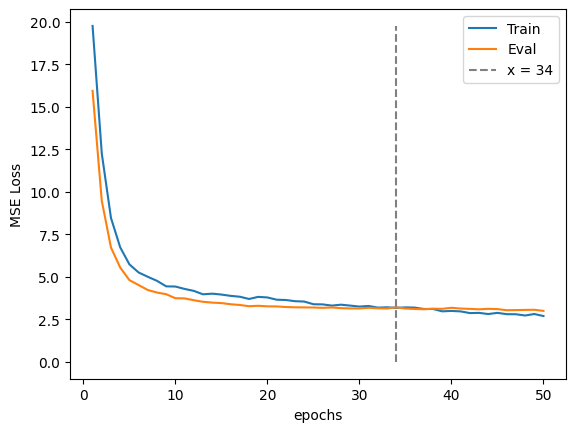

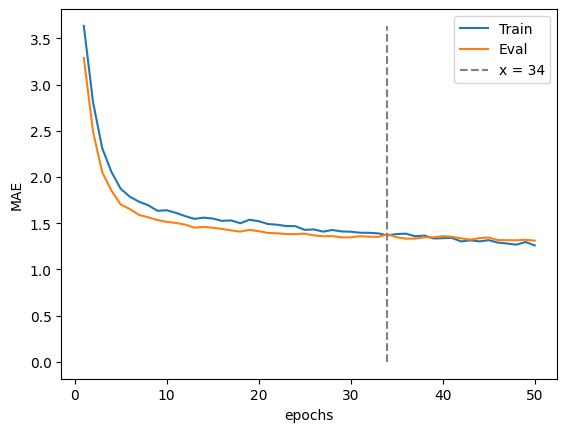

MAE on train set:  0.9946091644204852
min prediction: 0
max prediction: 9

MAE on test set:  1.3114624505928854
Error <= 3: 94.78 %
min prediction: 0
max prediction: 9


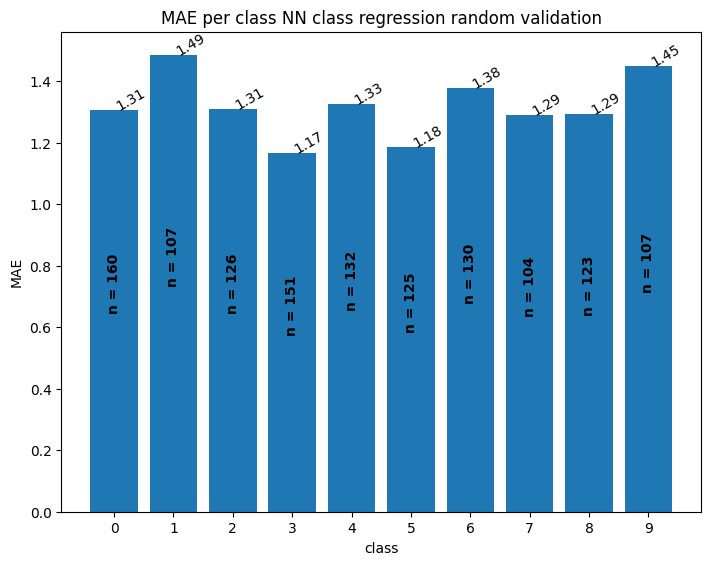

-----------|class error-MAE| difference-----------
mean: 0.13770063828965123
std: 0.08466935725106559
coefficient of variation (std/mean): 0.6148799185154455

----------normalized difference-------------
mean: 0.48651415107060886
std: 0.29914778156690713


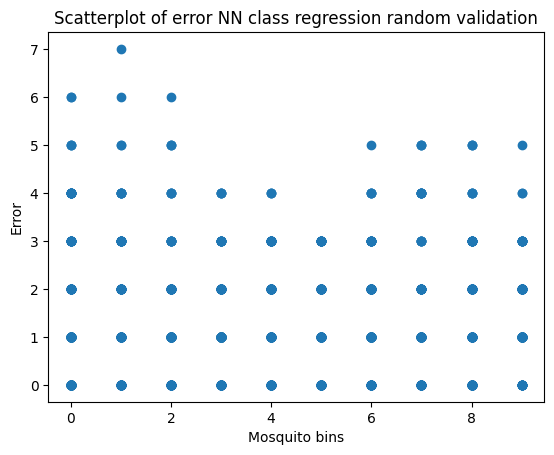

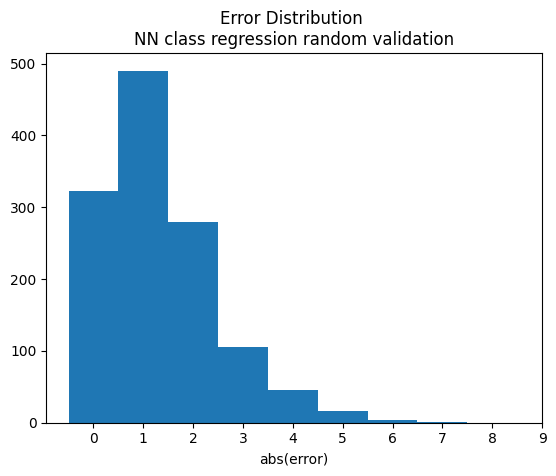

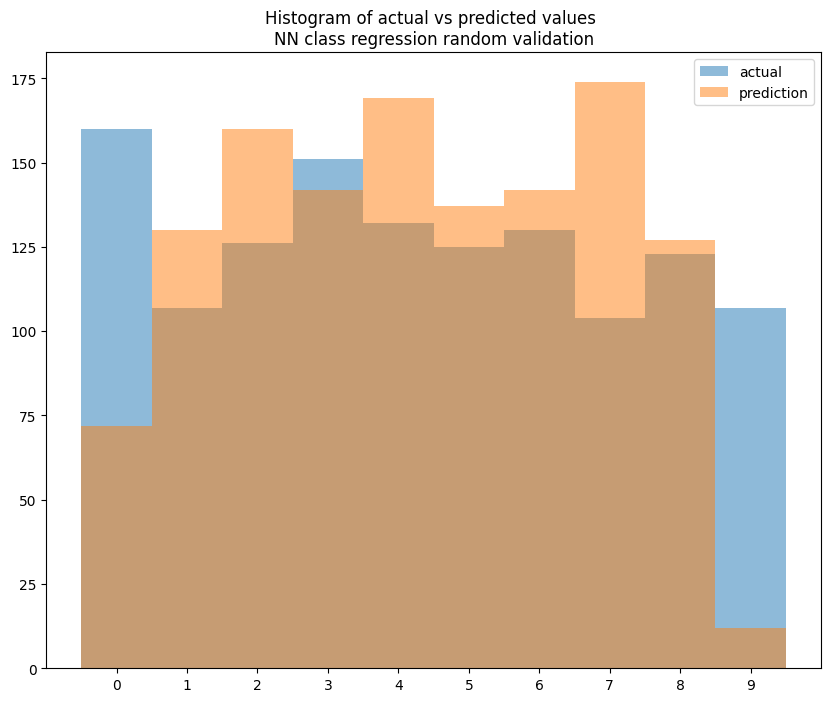

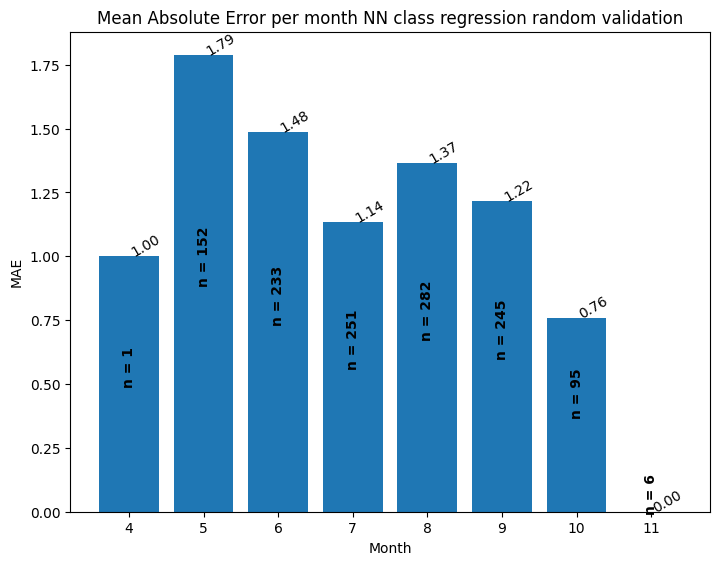

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 19.34856 | Val Loss: 15.92828 | Train Acc: 3.592| Val Acc: 3.324
Epoch 002: | Train Loss: 11.48635 | Val Loss: 9.14764 | Train Acc: 2.711| Val Acc: 2.486
Epoch 003: | Train Loss: 8.04699 | Val Loss: 6.41232 | Train Acc: 2.250| Val Acc: 2.039
Epoch 004: | Train Loss: 6.39883 | Val Loss: 5.03524 | Train Acc: 1.972| Val Acc: 1.782
Epoch 005: | Train Loss: 5.50354 | Val Loss: 4.40205 | Train Acc: 1.827| Val Acc: 1.597
Epoch 006: | Train Loss: 5.01280 | Val Loss: 4.11378 | Train Acc: 1.739| Val Acc: 1.570
Epoch 007: | Train Loss: 4.82760 | Val Loss: 3.97128 | Train Acc: 1.708| Val Acc: 1.541
Epoch 008: | Train Loss: 4.62459 | Val Loss: 3.84947 | Train Acc: 1.674| Val Acc: 1.509
Epoch 009: | Train Loss: 4.45888 | Val Loss: 3.68141 | Train Acc: 1.643| Val Acc: 1.488
Epoch 010: | Train Loss: 4.20823 | Val Loss: 3.52788 | Train Acc: 1.596| Val Acc: 1.445
Epoch 011: | Train Loss: 4.13892 | Val Loss: 3.41428 | Train Acc: 1.577| Val Acc: 1.419
Epoch 012: | Train Loss: 4.08

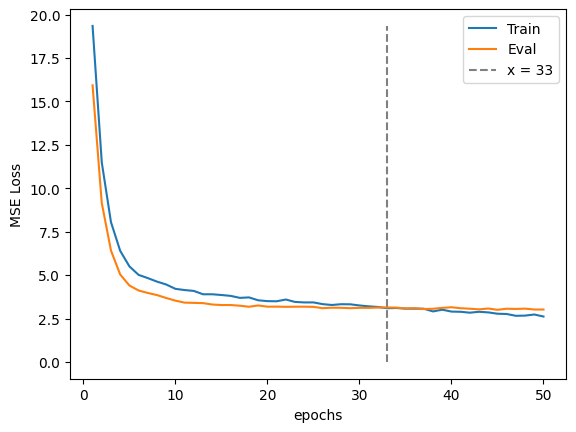

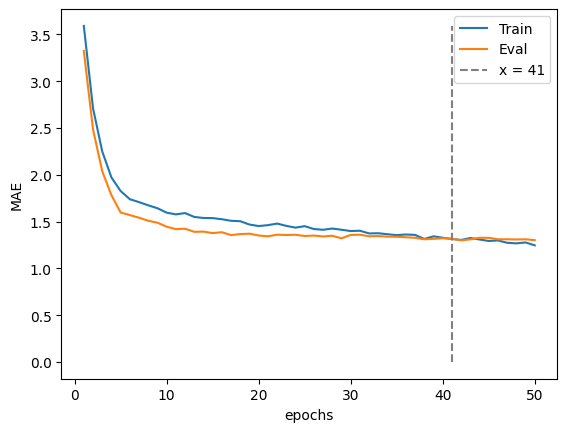

Epoch 001: | Train Loss: 19.47707 | Val Loss: 15.52365 | Train Acc: 3.597| Val Acc: 3.256
Epoch 002: | Train Loss: 11.51866 | Val Loss: 9.19969 | Train Acc: 2.713| Val Acc: 2.465
Epoch 003: | Train Loss: 7.87285 | Val Loss: 6.61489 | Train Acc: 2.210| Val Acc: 2.027
Epoch 004: | Train Loss: 6.34600 | Val Loss: 5.50243 | Train Acc: 1.985| Val Acc: 1.851
Epoch 005: | Train Loss: 5.50321 | Val Loss: 4.94249 | Train Acc: 1.828| Val Acc: 1.732
Epoch 006: | Train Loss: 5.14655 | Val Loss: 4.63306 | Train Acc: 1.760| Val Acc: 1.680
Epoch 007: | Train Loss: 4.79413 | Val Loss: 4.40102 | Train Acc: 1.708| Val Acc: 1.635
Epoch 008: | Train Loss: 4.61257 | Val Loss: 4.27709 | Train Acc: 1.677| Val Acc: 1.610
Epoch 009: | Train Loss: 4.32365 | Val Loss: 4.03976 | Train Acc: 1.600| Val Acc: 1.540
Epoch 010: | Train Loss: 4.29327 | Val Loss: 3.96869 | Train Acc: 1.611| Val Acc: 1.520
Epoch 011: | Train Loss: 4.08508 | Val Loss: 3.90706 | Train Acc: 1.577| Val Acc: 1.492
Epoch 012: | Train Loss: 4.01

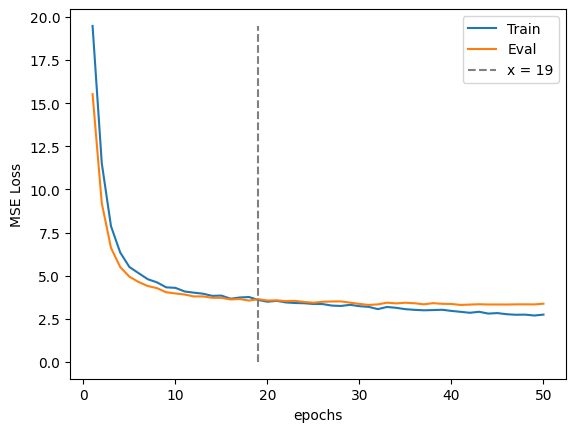

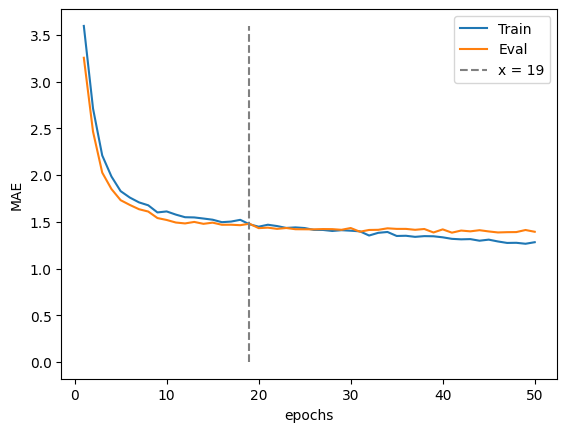

Epoch 001: | Train Loss: 19.38914 | Val Loss: 15.19172 | Train Acc: 3.595| Val Acc: 3.235
Epoch 002: | Train Loss: 11.65923 | Val Loss: 8.16569 | Train Acc: 2.732| Val Acc: 2.332
Epoch 003: | Train Loss: 8.00793 | Val Loss: 5.96186 | Train Acc: 2.231| Val Acc: 1.978
Epoch 004: | Train Loss: 6.32865 | Val Loss: 4.80068 | Train Acc: 1.971| Val Acc: 1.738
Epoch 005: | Train Loss: 5.44614 | Val Loss: 4.33298 | Train Acc: 1.818| Val Acc: 1.654
Epoch 006: | Train Loss: 5.09629 | Val Loss: 4.15558 | Train Acc: 1.743| Val Acc: 1.645
Epoch 007: | Train Loss: 4.81733 | Val Loss: 3.79041 | Train Acc: 1.701| Val Acc: 1.521
Epoch 008: | Train Loss: 4.65708 | Val Loss: 3.70044 | Train Acc: 1.671| Val Acc: 1.474
Epoch 009: | Train Loss: 4.37351 | Val Loss: 3.58957 | Train Acc: 1.618| Val Acc: 1.460
Epoch 010: | Train Loss: 4.33670 | Val Loss: 3.45140 | Train Acc: 1.616| Val Acc: 1.423
Epoch 011: | Train Loss: 4.24672 | Val Loss: 3.38648 | Train Acc: 1.596| Val Acc: 1.413
Epoch 012: | Train Loss: 4.20

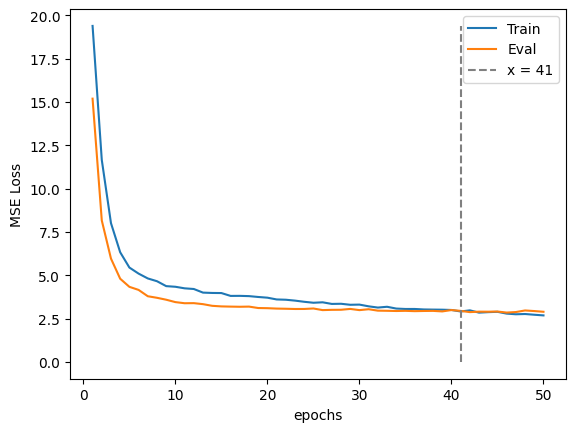

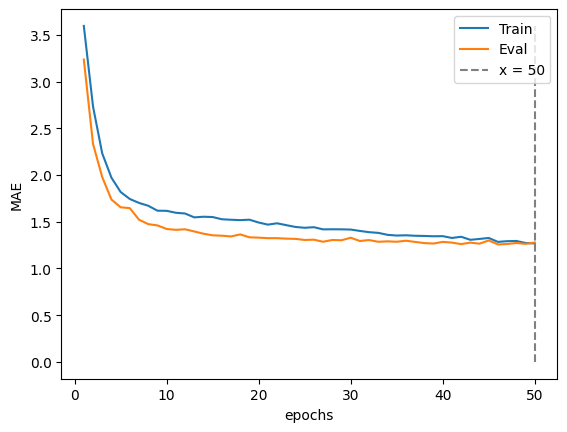

Epoch 001: | Train Loss: 19.54284 | Val Loss: 15.50583 | Train Acc: 3.610| Val Acc: 3.193
Epoch 002: | Train Loss: 11.73953 | Val Loss: 8.55439 | Train Acc: 2.742| Val Acc: 2.284
Epoch 003: | Train Loss: 8.03759 | Val Loss: 6.09928 | Train Acc: 2.237| Val Acc: 1.907
Epoch 004: | Train Loss: 6.40594 | Val Loss: 5.21816 | Train Acc: 1.993| Val Acc: 1.730
Epoch 005: | Train Loss: 5.49942 | Val Loss: 4.56239 | Train Acc: 1.842| Val Acc: 1.648
Epoch 006: | Train Loss: 5.22250 | Val Loss: 4.16490 | Train Acc: 1.774| Val Acc: 1.584
Epoch 007: | Train Loss: 4.83135 | Val Loss: 3.88623 | Train Acc: 1.707| Val Acc: 1.506
Epoch 008: | Train Loss: 4.67961 | Val Loss: 3.78818 | Train Acc: 1.686| Val Acc: 1.507
Epoch 009: | Train Loss: 4.34161 | Val Loss: 3.61168 | Train Acc: 1.630| Val Acc: 1.471
Epoch 010: | Train Loss: 4.22961 | Val Loss: 3.49213 | Train Acc: 1.605| Val Acc: 1.442
Epoch 011: | Train Loss: 4.17691 | Val Loss: 3.39538 | Train Acc: 1.584| Val Acc: 1.436
Epoch 012: | Train Loss: 4.12

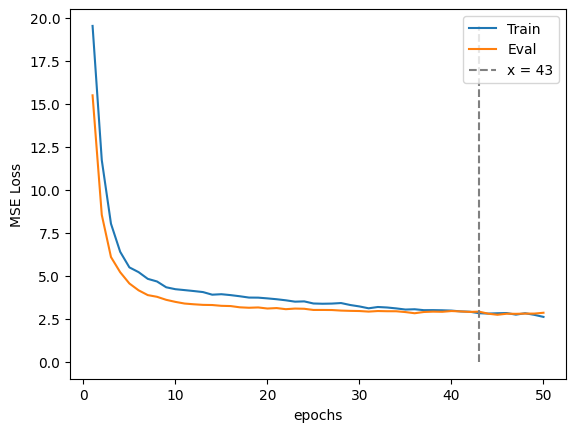

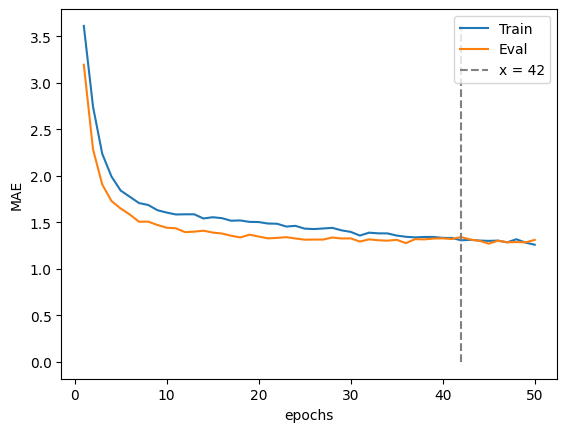

Epoch 001: | Train Loss: 19.41042 | Val Loss: 15.44524 | Train Acc: 3.590| Val Acc: 3.225
Epoch 002: | Train Loss: 11.36724 | Val Loss: 8.96910 | Train Acc: 2.703| Val Acc: 2.421
Epoch 003: | Train Loss: 7.87346 | Val Loss: 6.53759 | Train Acc: 2.219| Val Acc: 2.027
Epoch 004: | Train Loss: 6.22357 | Val Loss: 5.53142 | Train Acc: 1.958| Val Acc: 1.824
Epoch 005: | Train Loss: 5.46010 | Val Loss: 4.73264 | Train Acc: 1.816| Val Acc: 1.674
Epoch 006: | Train Loss: 5.15260 | Val Loss: 4.28135 | Train Acc: 1.766| Val Acc: 1.591
Epoch 007: | Train Loss: 4.80476 | Val Loss: 3.94337 | Train Acc: 1.693| Val Acc: 1.514
Epoch 008: | Train Loss: 4.51000 | Val Loss: 3.77114 | Train Acc: 1.642| Val Acc: 1.490
Epoch 009: | Train Loss: 4.27615 | Val Loss: 3.74613 | Train Acc: 1.622| Val Acc: 1.479
Epoch 010: | Train Loss: 4.34513 | Val Loss: 3.64075 | Train Acc: 1.630| Val Acc: 1.463
Epoch 011: | Train Loss: 4.16046 | Val Loss: 3.55441 | Train Acc: 1.596| Val Acc: 1.437
Epoch 012: | Train Loss: 3.97

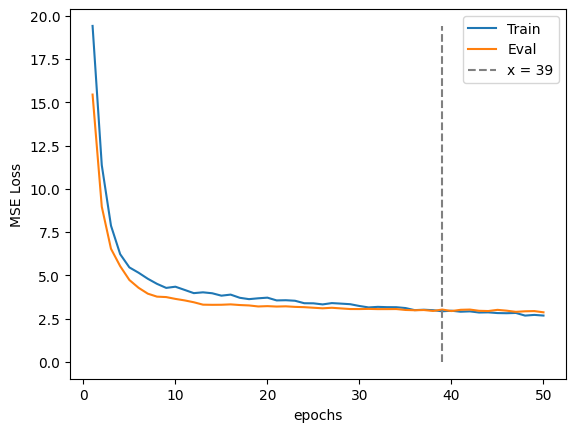

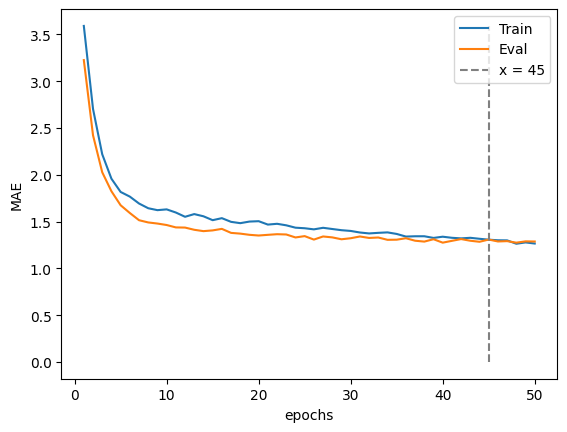

Epoch 001: | Train Loss: 19.32629 | Val Loss: 15.56527 | Train Acc: 3.599| Val Acc: 3.233
Epoch 002: | Train Loss: 11.51757 | Val Loss: 8.49024 | Train Acc: 2.718| Val Acc: 2.366
Epoch 003: | Train Loss: 7.83825 | Val Loss: 6.18723 | Train Acc: 2.214| Val Acc: 2.017
Epoch 004: | Train Loss: 6.19549 | Val Loss: 5.10648 | Train Acc: 1.959| Val Acc: 1.828
Epoch 005: | Train Loss: 5.48317 | Val Loss: 4.56164 | Train Acc: 1.828| Val Acc: 1.699
Epoch 006: | Train Loss: 5.06255 | Val Loss: 4.23305 | Train Acc: 1.744| Val Acc: 1.624
Epoch 007: | Train Loss: 4.87228 | Val Loss: 4.14451 | Train Acc: 1.715| Val Acc: 1.601
Epoch 008: | Train Loss: 4.57491 | Val Loss: 3.83341 | Train Acc: 1.667| Val Acc: 1.545
Epoch 009: | Train Loss: 4.41641 | Val Loss: 3.65700 | Train Acc: 1.649| Val Acc: 1.508
Epoch 010: | Train Loss: 4.27214 | Val Loss: 3.61152 | Train Acc: 1.611| Val Acc: 1.516
Epoch 011: | Train Loss: 4.13401 | Val Loss: 3.56998 | Train Acc: 1.576| Val Acc: 1.487
Epoch 012: | Train Loss: 4.00

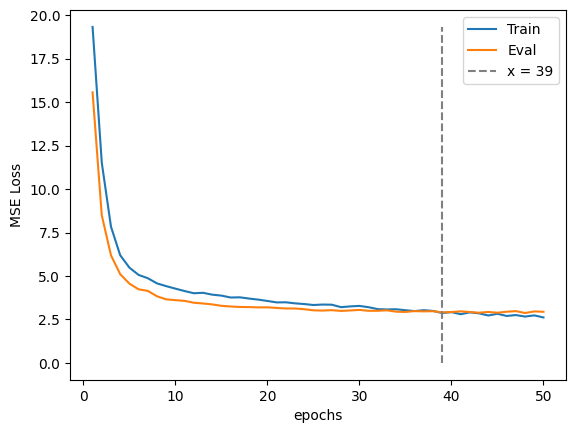

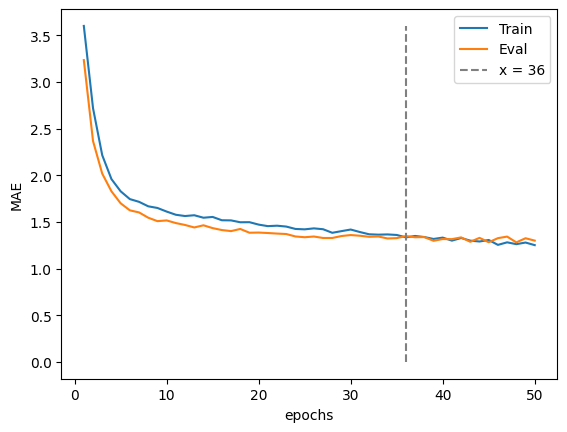

Epoch 001: | Train Loss: 19.29822 | Val Loss: 14.63844 | Train Acc: 3.591| Val Acc: 3.052
Epoch 002: | Train Loss: 11.51359 | Val Loss: 8.47680 | Train Acc: 2.732| Val Acc: 2.323
Epoch 003: | Train Loss: 7.94331 | Val Loss: 6.46986 | Train Acc: 2.228| Val Acc: 1.991
Epoch 004: | Train Loss: 6.25122 | Val Loss: 5.27824 | Train Acc: 1.954| Val Acc: 1.820
Epoch 005: | Train Loss: 5.49642 | Val Loss: 4.45501 | Train Acc: 1.817| Val Acc: 1.658
Epoch 006: | Train Loss: 5.21073 | Val Loss: 4.04589 | Train Acc: 1.770| Val Acc: 1.580
Epoch 007: | Train Loss: 4.84985 | Val Loss: 3.95869 | Train Acc: 1.700| Val Acc: 1.547
Epoch 008: | Train Loss: 4.63422 | Val Loss: 3.74857 | Train Acc: 1.671| Val Acc: 1.522
Epoch 009: | Train Loss: 4.41818 | Val Loss: 3.69991 | Train Acc: 1.630| Val Acc: 1.496
Epoch 010: | Train Loss: 4.32313 | Val Loss: 3.61415 | Train Acc: 1.617| Val Acc: 1.463
Epoch 011: | Train Loss: 4.19059 | Val Loss: 3.47643 | Train Acc: 1.593| Val Acc: 1.445
Epoch 012: | Train Loss: 4.06

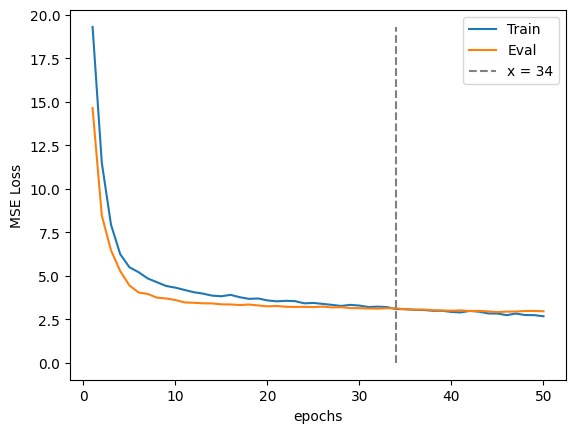

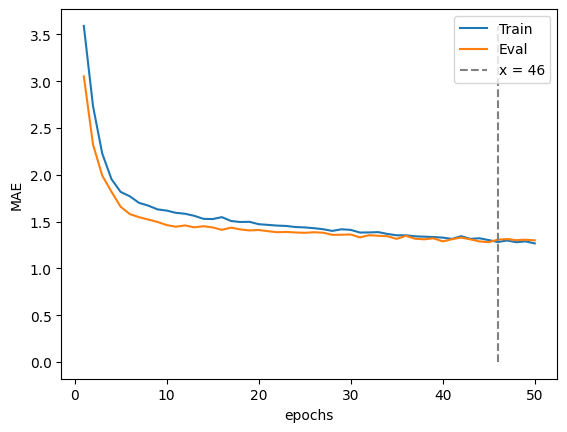

Epoch 001: | Train Loss: 19.33484 | Val Loss: 15.01283 | Train Acc: 3.600| Val Acc: 3.175
Epoch 002: | Train Loss: 11.67041 | Val Loss: 9.06400 | Train Acc: 2.738| Val Acc: 2.408
Epoch 003: | Train Loss: 7.96391 | Val Loss: 6.32450 | Train Acc: 2.233| Val Acc: 2.004
Epoch 004: | Train Loss: 6.25200 | Val Loss: 5.13898 | Train Acc: 1.954| Val Acc: 1.811
Epoch 005: | Train Loss: 5.45039 | Val Loss: 4.80782 | Train Acc: 1.806| Val Acc: 1.740
Epoch 006: | Train Loss: 5.03482 | Val Loss: 4.48876 | Train Acc: 1.743| Val Acc: 1.669
Epoch 007: | Train Loss: 4.79290 | Val Loss: 4.18205 | Train Acc: 1.695| Val Acc: 1.620
Epoch 008: | Train Loss: 4.52766 | Val Loss: 4.00011 | Train Acc: 1.645| Val Acc: 1.609
Epoch 009: | Train Loss: 4.43254 | Val Loss: 3.86292 | Train Acc: 1.640| Val Acc: 1.590
Epoch 010: | Train Loss: 4.30402 | Val Loss: 3.72371 | Train Acc: 1.605| Val Acc: 1.534
Epoch 011: | Train Loss: 4.14727 | Val Loss: 3.64271 | Train Acc: 1.577| Val Acc: 1.534
Epoch 012: | Train Loss: 4.11

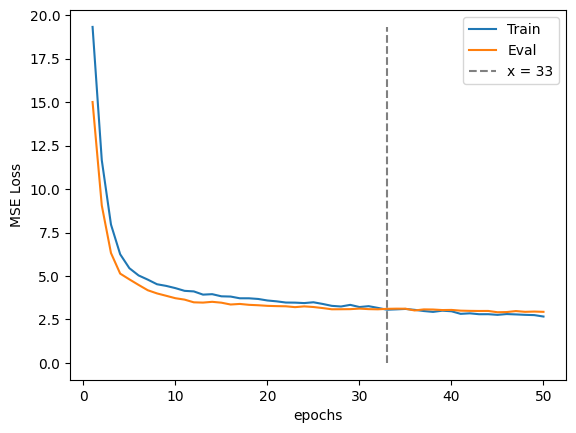

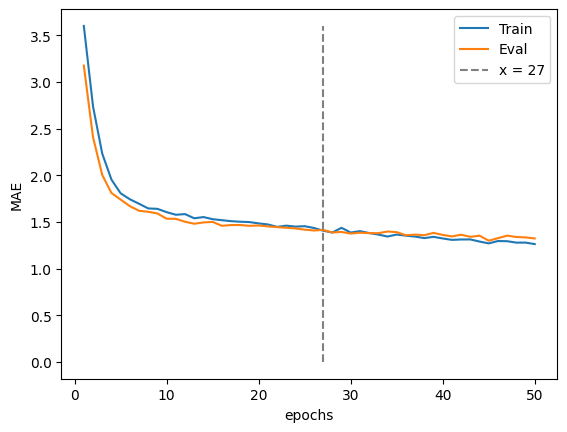

Epoch 001: | Train Loss: 19.27514 | Val Loss: 16.39893 | Train Acc: 3.593| Val Acc: 3.343
Epoch 002: | Train Loss: 11.54220 | Val Loss: 9.27031 | Train Acc: 2.711| Val Acc: 2.435
Epoch 003: | Train Loss: 8.00285 | Val Loss: 6.71336 | Train Acc: 2.236| Val Acc: 2.082
Epoch 004: | Train Loss: 6.41973 | Val Loss: 5.55596 | Train Acc: 1.990| Val Acc: 1.848
Epoch 005: | Train Loss: 5.55810 | Val Loss: 5.10437 | Train Acc: 1.836| Val Acc: 1.759
Epoch 006: | Train Loss: 5.07222 | Val Loss: 4.65102 | Train Acc: 1.748| Val Acc: 1.667
Epoch 007: | Train Loss: 4.78620 | Val Loss: 4.40209 | Train Acc: 1.704| Val Acc: 1.629
Epoch 008: | Train Loss: 4.65528 | Val Loss: 3.97754 | Train Acc: 1.681| Val Acc: 1.534
Epoch 009: | Train Loss: 4.43085 | Val Loss: 3.95003 | Train Acc: 1.636| Val Acc: 1.558
Epoch 010: | Train Loss: 4.30668 | Val Loss: 3.71726 | Train Acc: 1.613| Val Acc: 1.517
Epoch 011: | Train Loss: 4.08280 | Val Loss: 3.66494 | Train Acc: 1.567| Val Acc: 1.493
Epoch 012: | Train Loss: 4.15

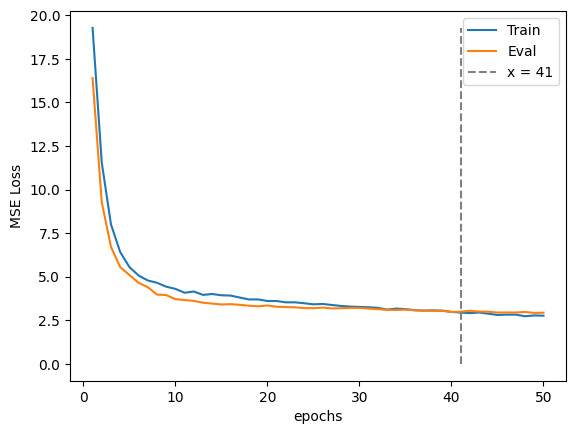

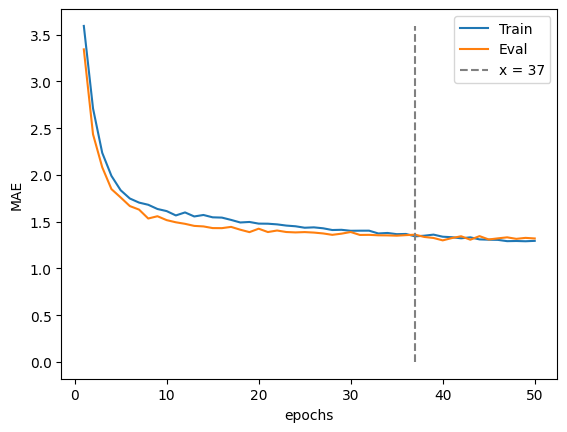

Epoch 001: | Train Loss: 19.55195 | Val Loss: 17.26723 | Train Acc: 3.614| Val Acc: 3.428
Epoch 002: | Train Loss: 11.49376 | Val Loss: 9.32845 | Train Acc: 2.710| Val Acc: 2.482
Epoch 003: | Train Loss: 7.83418 | Val Loss: 6.64516 | Train Acc: 2.199| Val Acc: 2.103
Epoch 004: | Train Loss: 6.19021 | Val Loss: 5.76546 | Train Acc: 1.930| Val Acc: 1.933
Epoch 005: | Train Loss: 5.54075 | Val Loss: 5.08570 | Train Acc: 1.832| Val Acc: 1.842
Epoch 006: | Train Loss: 5.08367 | Val Loss: 4.59572 | Train Acc: 1.757| Val Acc: 1.721
Epoch 007: | Train Loss: 4.90463 | Val Loss: 4.31437 | Train Acc: 1.725| Val Acc: 1.677
Epoch 008: | Train Loss: 4.59148 | Val Loss: 4.16136 | Train Acc: 1.661| Val Acc: 1.621
Epoch 009: | Train Loss: 4.49685 | Val Loss: 3.98492 | Train Acc: 1.628| Val Acc: 1.578
Epoch 010: | Train Loss: 4.28510 | Val Loss: 3.82525 | Train Acc: 1.613| Val Acc: 1.561
Epoch 011: | Train Loss: 4.14366 | Val Loss: 3.75660 | Train Acc: 1.579| Val Acc: 1.526
Epoch 012: | Train Loss: 4.00

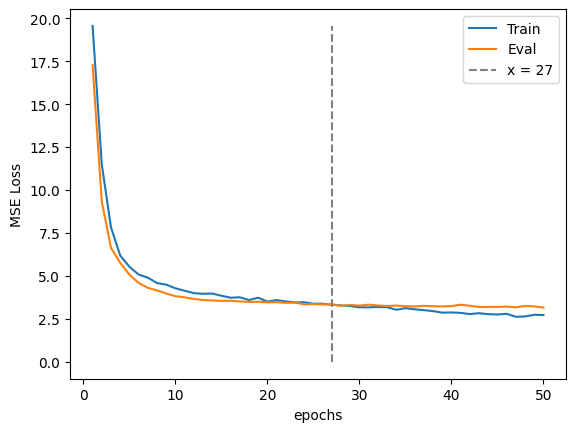

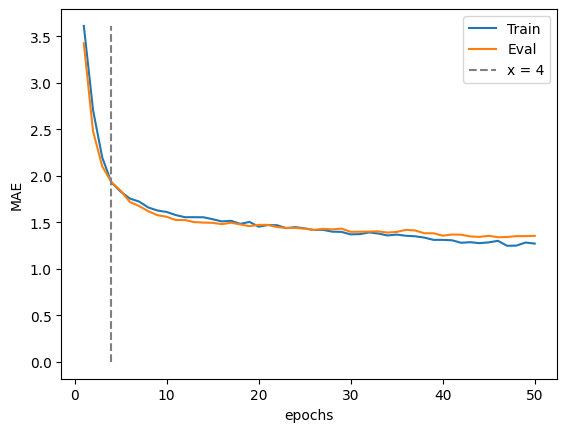

MAE on train set:  0.9999473157367894
min prediction: 0
max prediction: 9

MAE on test set:  1.3172119487908962
Error <= 3: 94.89 %
min prediction: 0
max prediction: 9


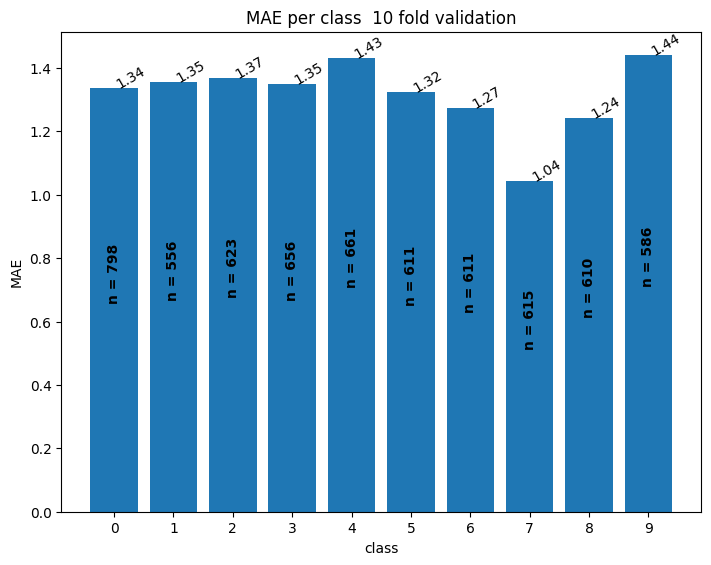

-----------|class error-MAE| difference-----------
mean: 0.12560594612846143
std: 0.10825510149978225
coefficient of variation (std/mean): 0.8618628722327055

----------normalized difference-------------
mean: 0.31424811644118467
std: 0.2708387842297171


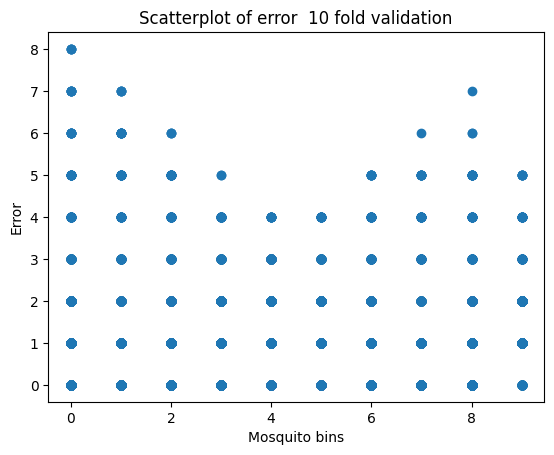

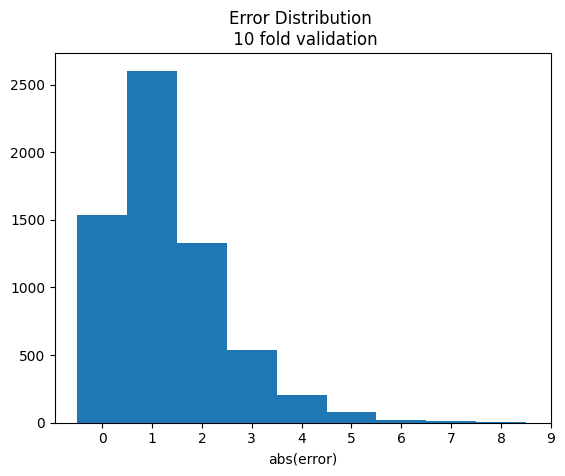

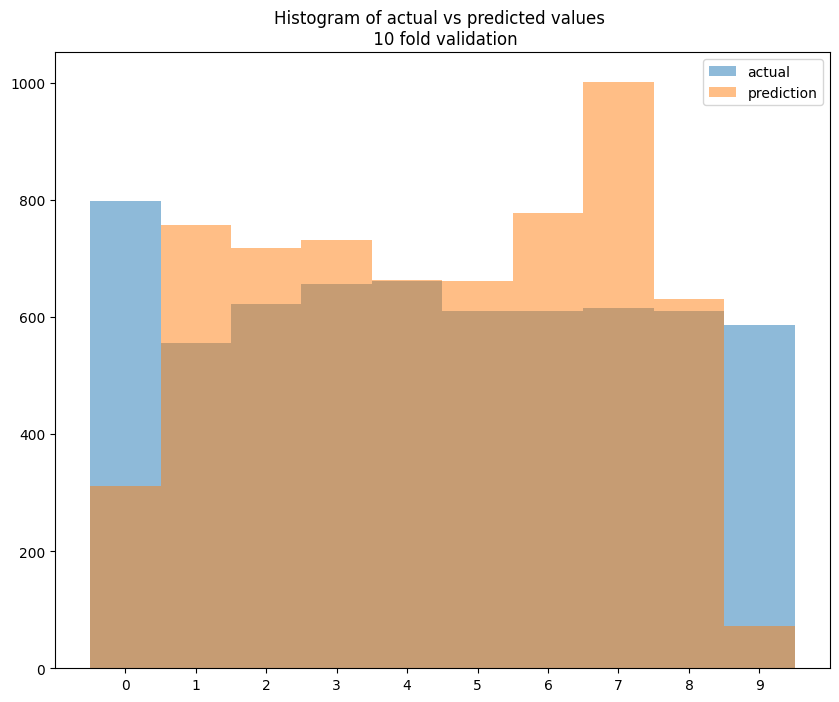

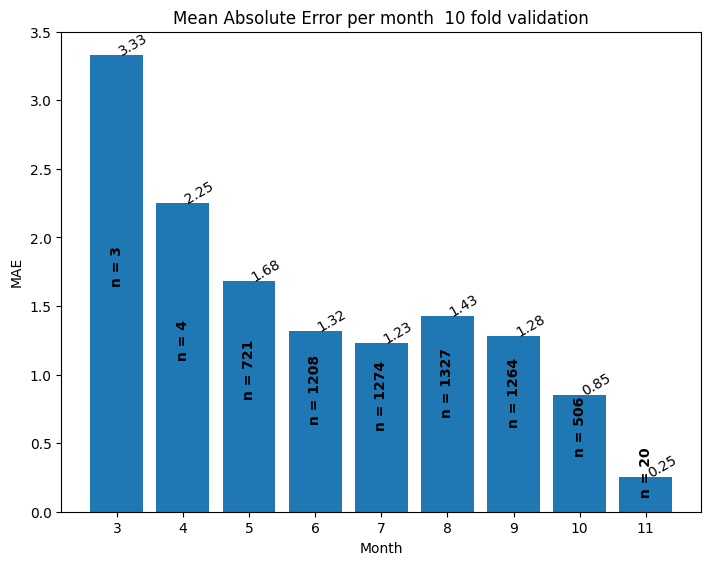

In [9]:
train_model_KFold(data, model, date_col=date_col)

Epoch 001: | Train Loss: 20.39395 | Val Loss: 16.11691 | Train Acc: 3.708| Val Acc: 3.088
Epoch 002: | Train Loss: 12.52665 | Val Loss: 16.05263 | Train Acc: 2.856| Val Acc: 3.080
Epoch 003: | Train Loss: 8.59859 | Val Loss: 16.00573 | Train Acc: 2.327| Val Acc: 3.080
Epoch 004: | Train Loss: 6.61002 | Val Loss: 16.03253 | Train Acc: 2.021| Val Acc: 3.104
Epoch 005: | Train Loss: 5.65269 | Val Loss: 16.03562 | Train Acc: 1.857| Val Acc: 3.080
Epoch 006: | Train Loss: 5.24119 | Val Loss: 16.01554 | Train Acc: 1.772| Val Acc: 3.080
Epoch 007: | Train Loss: 4.76717 | Val Loss: 16.06472 | Train Acc: 1.703| Val Acc: 3.084
Epoch 008: | Train Loss: 4.55513 | Val Loss: 16.12872 | Train Acc: 1.660| Val Acc: 3.088
Epoch 009: | Train Loss: 4.49285 | Val Loss: 16.12148 | Train Acc: 1.641| Val Acc: 3.112
Epoch 010: | Train Loss: 4.20391 | Val Loss: 16.11014 | Train Acc: 1.598| Val Acc: 3.112
Epoch 011: | Train Loss: 4.13969 | Val Loss: 16.11834 | Train Acc: 1.583| Val Acc: 3.088
Epoch 012: | Train 

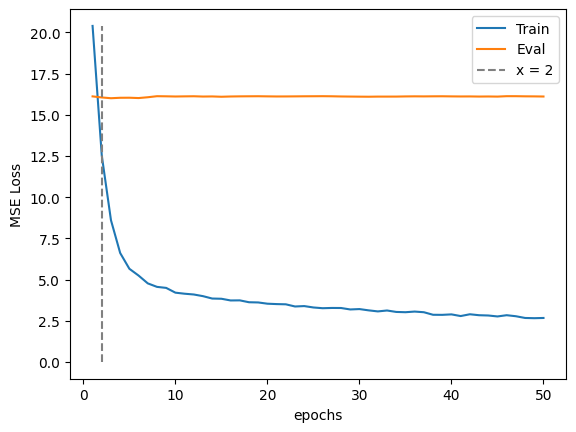

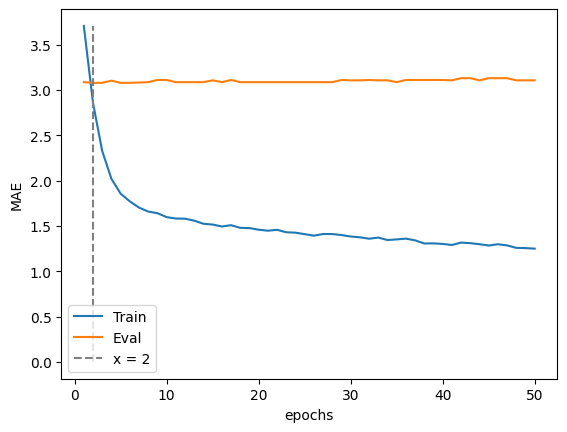

Epoch 001: | Train Loss: 3.24765 | Val Loss: 6.70982 | Train Acc: 1.400| Val Acc: 2.126
Epoch 002: | Train Loss: 3.07956 | Val Loss: 5.62575 | Train Acc: 1.351| Val Acc: 1.916
Epoch 003: | Train Loss: 3.15433 | Val Loss: 5.92193 | Train Acc: 1.361| Val Acc: 1.934
Epoch 004: | Train Loss: 3.03905 | Val Loss: 5.22760 | Train Acc: 1.359| Val Acc: 1.839
Epoch 005: | Train Loss: 2.98478 | Val Loss: 4.94164 | Train Acc: 1.347| Val Acc: 1.766
Epoch 006: | Train Loss: 2.94874 | Val Loss: 4.83377 | Train Acc: 1.332| Val Acc: 1.741
Epoch 007: | Train Loss: 2.89906 | Val Loss: 4.98143 | Train Acc: 1.313| Val Acc: 1.777
Epoch 008: | Train Loss: 2.89415 | Val Loss: 4.77971 | Train Acc: 1.311| Val Acc: 1.755
Epoch 009: | Train Loss: 2.79840 | Val Loss: 6.44981 | Train Acc: 1.305| Val Acc: 2.018
Epoch 010: | Train Loss: 2.74023 | Val Loss: 6.67669 | Train Acc: 1.284| Val Acc: 2.103
Epoch 011: | Train Loss: 2.75316 | Val Loss: 5.98086 | Train Acc: 1.269| Val Acc: 1.880
Epoch 012: | Train Loss: 2.63707

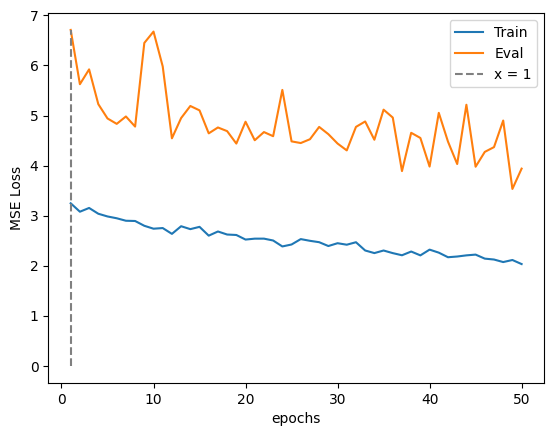

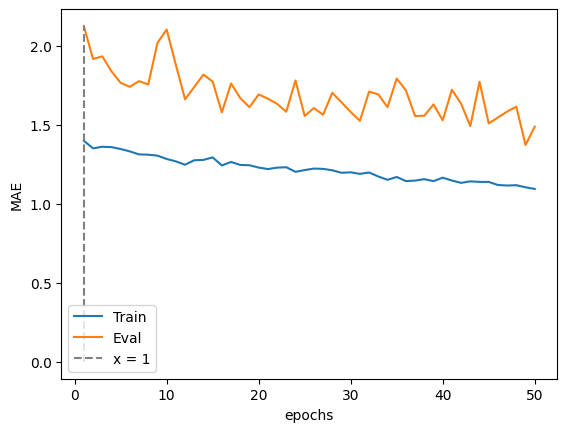

Epoch 001: | Train Loss: 2.33164 | Val Loss: 7.19625 | Train Acc: 1.162| Val Acc: 2.167
Epoch 002: | Train Loss: 2.19458 | Val Loss: 6.63041 | Train Acc: 1.133| Val Acc: 2.060
Epoch 003: | Train Loss: 2.24120 | Val Loss: 6.84269 | Train Acc: 1.145| Val Acc: 2.038
Epoch 004: | Train Loss: 2.21215 | Val Loss: 7.26960 | Train Acc: 1.148| Val Acc: 2.181
Epoch 005: | Train Loss: 2.15770 | Val Loss: 6.39055 | Train Acc: 1.116| Val Acc: 2.022
Epoch 006: | Train Loss: 2.15555 | Val Loss: 7.83720 | Train Acc: 1.123| Val Acc: 2.181
Epoch 007: | Train Loss: 2.14881 | Val Loss: 6.55872 | Train Acc: 1.125| Val Acc: 2.016
Epoch 008: | Train Loss: 2.06435 | Val Loss: 7.06517 | Train Acc: 1.094| Val Acc: 2.117
Epoch 009: | Train Loss: 2.12661 | Val Loss: 7.81617 | Train Acc: 1.119| Val Acc: 2.258
Epoch 010: | Train Loss: 2.04395 | Val Loss: 7.02184 | Train Acc: 1.096| Val Acc: 2.122
Epoch 011: | Train Loss: 2.05700 | Val Loss: 7.31420 | Train Acc: 1.101| Val Acc: 2.207
Epoch 012: | Train Loss: 2.02741

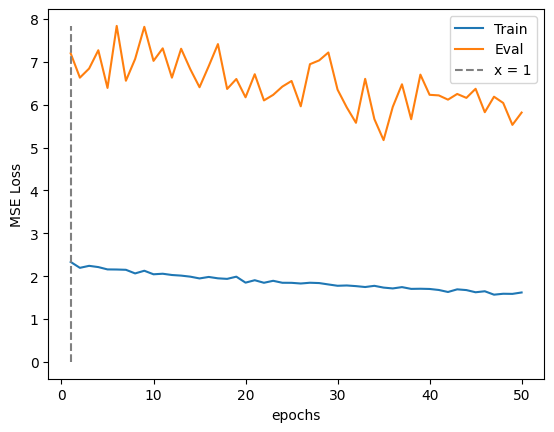

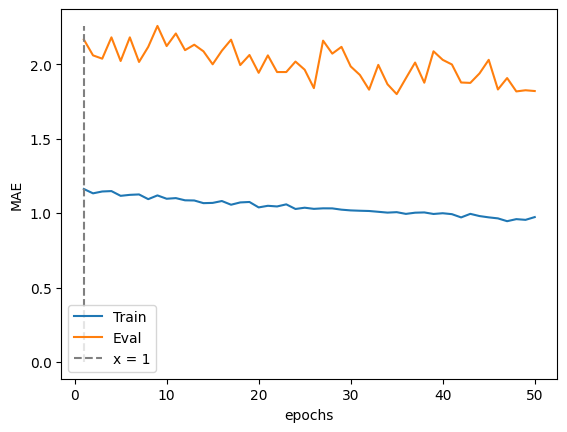

Epoch 001: | Train Loss: 1.96849 | Val Loss: 3.24449 | Train Acc: 1.074| Val Acc: 1.443
Epoch 002: | Train Loss: 1.87236 | Val Loss: 3.57615 | Train Acc: 1.033| Val Acc: 1.508
Epoch 003: | Train Loss: 1.86280 | Val Loss: 3.35774 | Train Acc: 1.036| Val Acc: 1.489
Epoch 004: | Train Loss: 1.80566 | Val Loss: 3.46312 | Train Acc: 1.022| Val Acc: 1.547
Epoch 005: | Train Loss: 1.86070 | Val Loss: 3.25900 | Train Acc: 1.027| Val Acc: 1.516
Epoch 006: | Train Loss: 1.82949 | Val Loss: 3.22347 | Train Acc: 1.025| Val Acc: 1.466
Epoch 007: | Train Loss: 1.76520 | Val Loss: 3.31260 | Train Acc: 1.014| Val Acc: 1.504
Epoch 008: | Train Loss: 1.73921 | Val Loss: 3.40768 | Train Acc: 1.008| Val Acc: 1.509
Epoch 009: | Train Loss: 1.78890 | Val Loss: 3.34629 | Train Acc: 1.023| Val Acc: 1.474
Epoch 010: | Train Loss: 1.69538 | Val Loss: 3.16085 | Train Acc: 0.991| Val Acc: 1.408
Epoch 011: | Train Loss: 1.67493 | Val Loss: 3.47613 | Train Acc: 0.979| Val Acc: 1.494
Epoch 012: | Train Loss: 1.71529

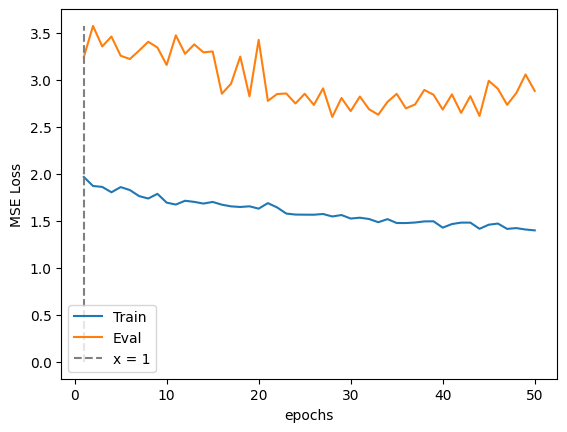

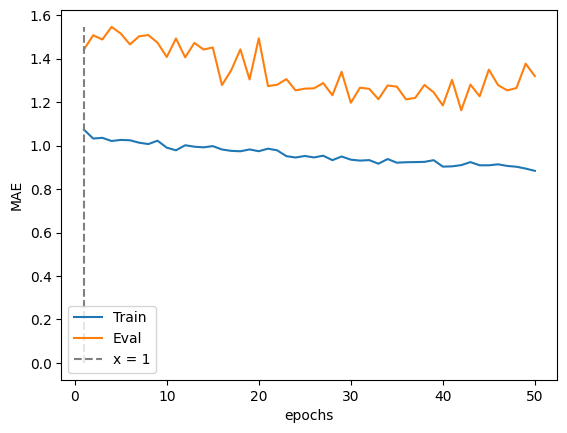

Epoch 001: | Train Loss: 1.71494 | Val Loss: 1.19792 | Train Acc: 0.986| Val Acc: 0.908
Epoch 002: | Train Loss: 1.63906 | Val Loss: 1.16769 | Train Acc: 0.967| Val Acc: 0.882
Epoch 003: | Train Loss: 1.59623 | Val Loss: 1.16710 | Train Acc: 0.959| Val Acc: 0.816
Epoch 004: | Train Loss: 1.61980 | Val Loss: 1.10184 | Train Acc: 0.956| Val Acc: 0.829
Epoch 005: | Train Loss: 1.61313 | Val Loss: 1.13762 | Train Acc: 0.960| Val Acc: 0.908
Epoch 006: | Train Loss: 1.55518 | Val Loss: 1.22767 | Train Acc: 0.945| Val Acc: 0.842
Epoch 007: | Train Loss: 1.56792 | Val Loss: 1.25327 | Train Acc: 0.951| Val Acc: 0.868
Epoch 008: | Train Loss: 1.56874 | Val Loss: 1.25049 | Train Acc: 0.944| Val Acc: 0.895
Epoch 009: | Train Loss: 1.57989 | Val Loss: 1.15952 | Train Acc: 0.948| Val Acc: 0.855
Epoch 010: | Train Loss: 1.53038 | Val Loss: 1.19319 | Train Acc: 0.950| Val Acc: 0.882
Epoch 011: | Train Loss: 1.53710 | Val Loss: 1.13250 | Train Acc: 0.945| Val Acc: 0.855
Epoch 012: | Train Loss: 1.50635

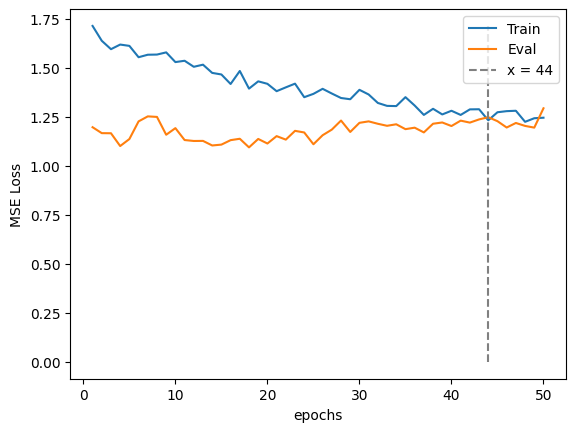

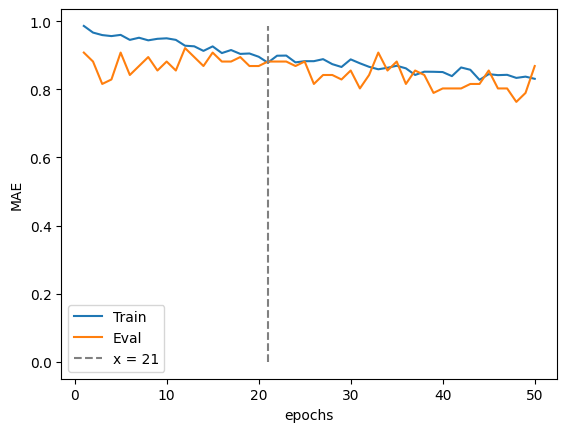

MAE on train set:  0.7009793988517393
min prediction: 0
max prediction: 9

MAE on test set:  1.9254571026722926
Error <= 3: 82.70 %
min prediction: 0
max prediction: 8


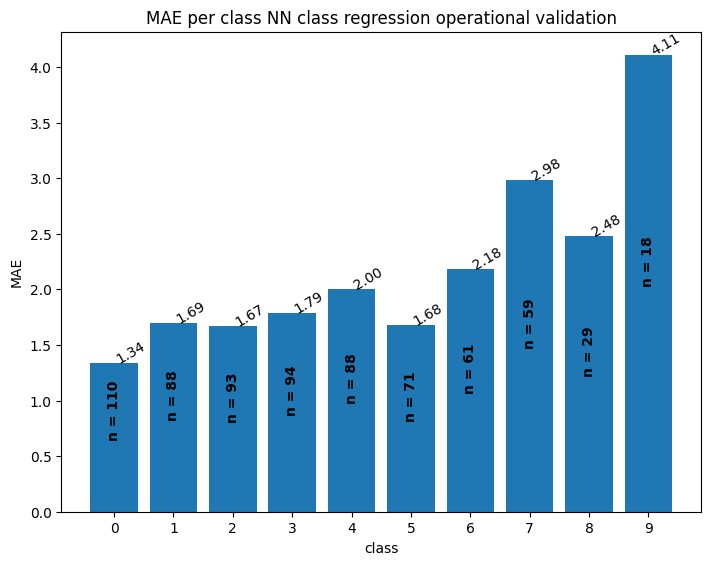

-----------|class error-MAE| difference-----------
mean: 1.9194360161206774
std: 0.7821272452490629
coefficient of variation (std/mean): 0.40747763336743054

----------normalized difference-------------
mean: 0.6917516039168078
std: 0.28187330644214503


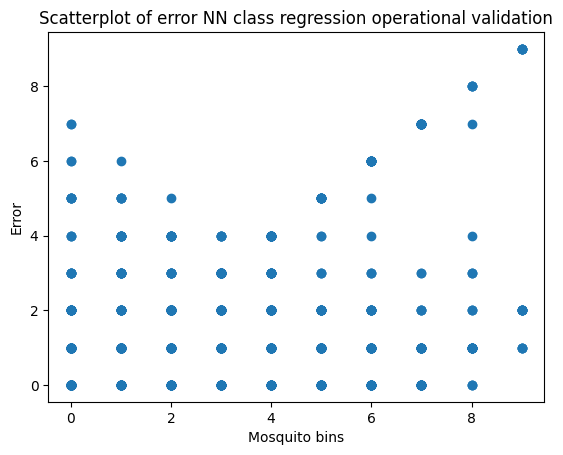

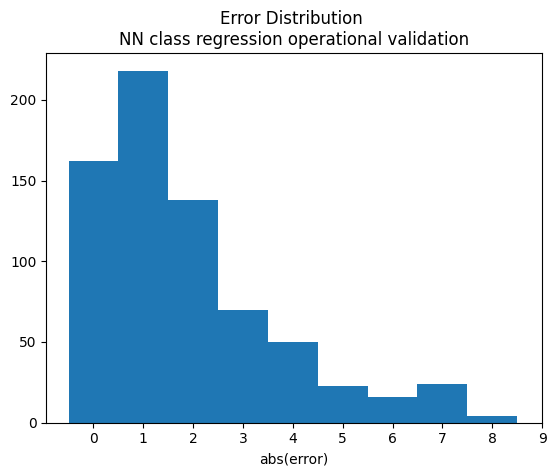

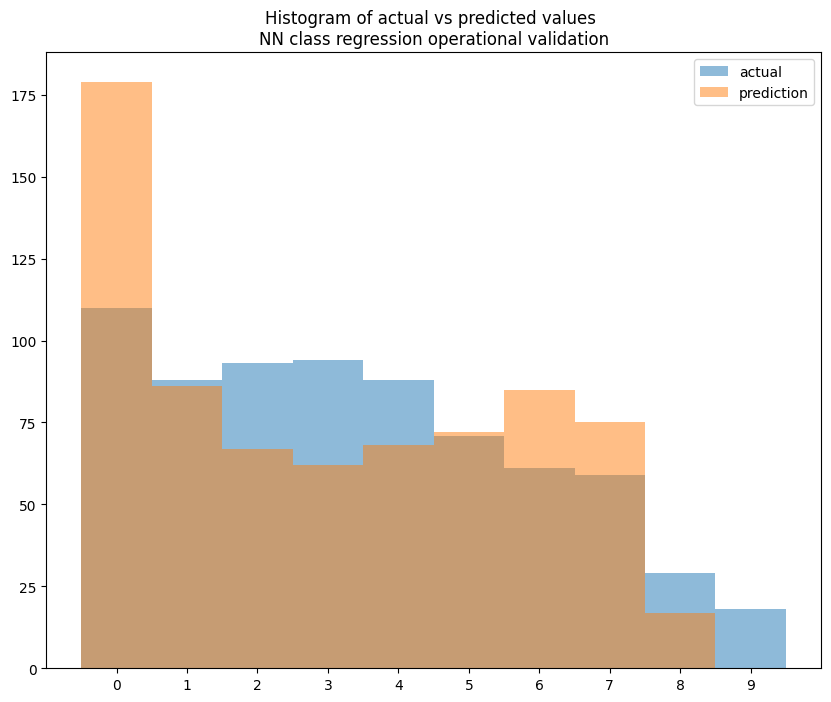

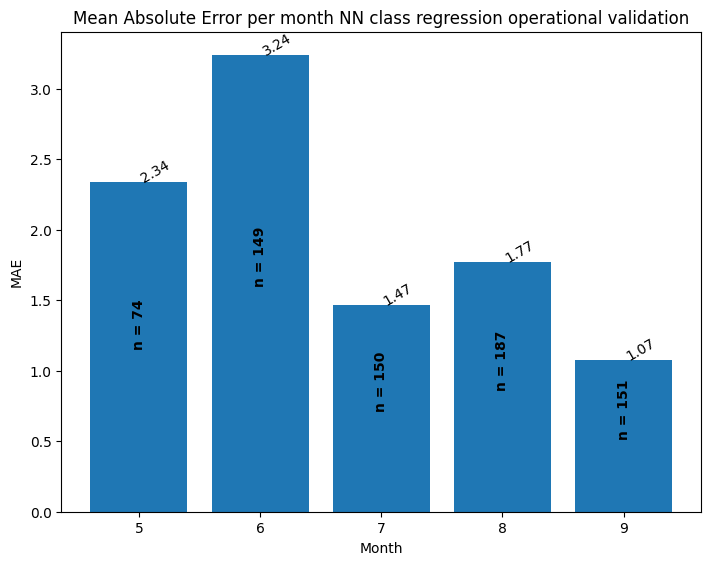

In [10]:
operational_validation(data, model, date='2022-01-01', filepath=path, date_col=date_col, case=case_title, export=exp)